# Exercise: Hyper-parameter Tuning for Ridge Regression  
The goal of this exercise is to perform hyper-parameter tuning and produce a plot similar to the one below:  
![4.3.6.image.png](4.3.6.image.png)

### Instructions  
- Read the dataset "polynomial50.csv" as a dataframe.  
- Assign the predictor and response variables.  
- Visualize the dataset by making plots using the predictor and response variables along with the true function.  
- Split the data into train and validation sets using `random_state=109`.  
- For each value of alpha from a given list:  
    - Estimate a Ridge regression on the training data with the alpha value.  
    - Calculate the MSE of training and validation data. Append to separate lists appropriately. 
    - Use the given plot_functions function to plot the value of parameters.  
- Compute the best hyperparameter for this data based on the lowest MSE  
- Make a plot of the MSE values for each value of hyper-parameter alpha from the list above. It should look similar to the one given above.  

### Dataset Description:  
- The dataset has a total of 3 columns with names - x,y and f  
- "$x$" represents the predictor variable  
- "$y$" is the response variable  
- "$f$" denotes the true values of the underlying function 

Hints
sklearn.Ridge()
Linear least squares with L2 regularization

sklearn.train_test_split()
Splits the data into random train and test subsets

ax.plot()
Plot y versus x as lines and/or markers

sklearn.PolynomialFeatures()
Generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree

sklearn.fit_transform()
Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X

sklearn.predict()
Predict using the linear modReturns the coefficient of the predictors in the model.

mean_squared_error()
Mean squared error regression loss

In [109]:
# Import required libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# These are custom functions made to help you visualise your results
from helper import plot_functions
from helper import plot_coefficients

In [110]:
# Open the file 'polynomial50.csv' as a dataframe

df = pd.read_csv('polynomial50.csv')

In [111]:
# Take a quick look at the data

df.head()

,x,f,y
0,0.000000,1.000000,0.923951
1,0.020408,1.039176,1.028283
2,0.040816,1.075173,1.069739
3,0.061224,1.108144,1.077327
4,0.081633,1.138242,1.105688


In [112]:
# Assign the values of the 'x' column as the predictor

x = df[['x']].values

# Assign the values of the 'y' column as the response

y = df['y'].values

# Also assign the true value of the function (column 'f') to the variable f 

f = df['f'].values

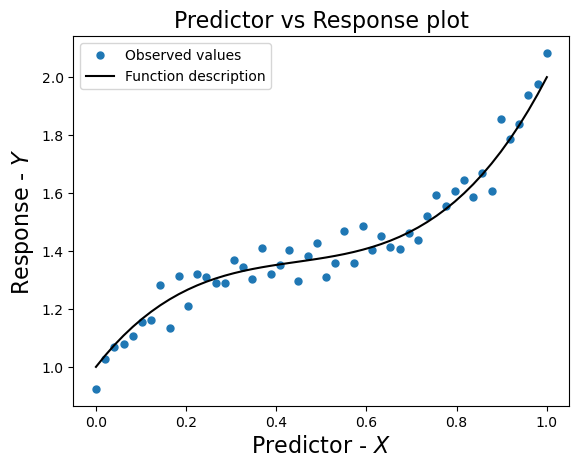

In [113]:
# Visualise the distribution of the x, y values & also the value of the true function f

fig, ax = plt.subplots()

# Plot x vs y values

ax.plot(x, y, '.', label = 'Observed values',markersize=10)

# Plot x vs true function value

ax.plot(x, f, 'k-', label = 'Function description')

# The code below is to annotate your plot

ax.legend(loc = 'best');

ax.set_xlabel('Predictor - $X$',fontsize=16)
ax.set_ylabel('Response - $Y$',fontsize=16)
ax.set_title('Predictor vs Response plot',fontsize=16);


In [114]:
# Split the data into train and validation sets with training size 80% and random_state = 109

x_train, x_val, y_train, y_val = train_test_split(x,y, train_size = 0.8,random_state=109)

In [115]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(40, 1) (10, 1) (40,) (10,)


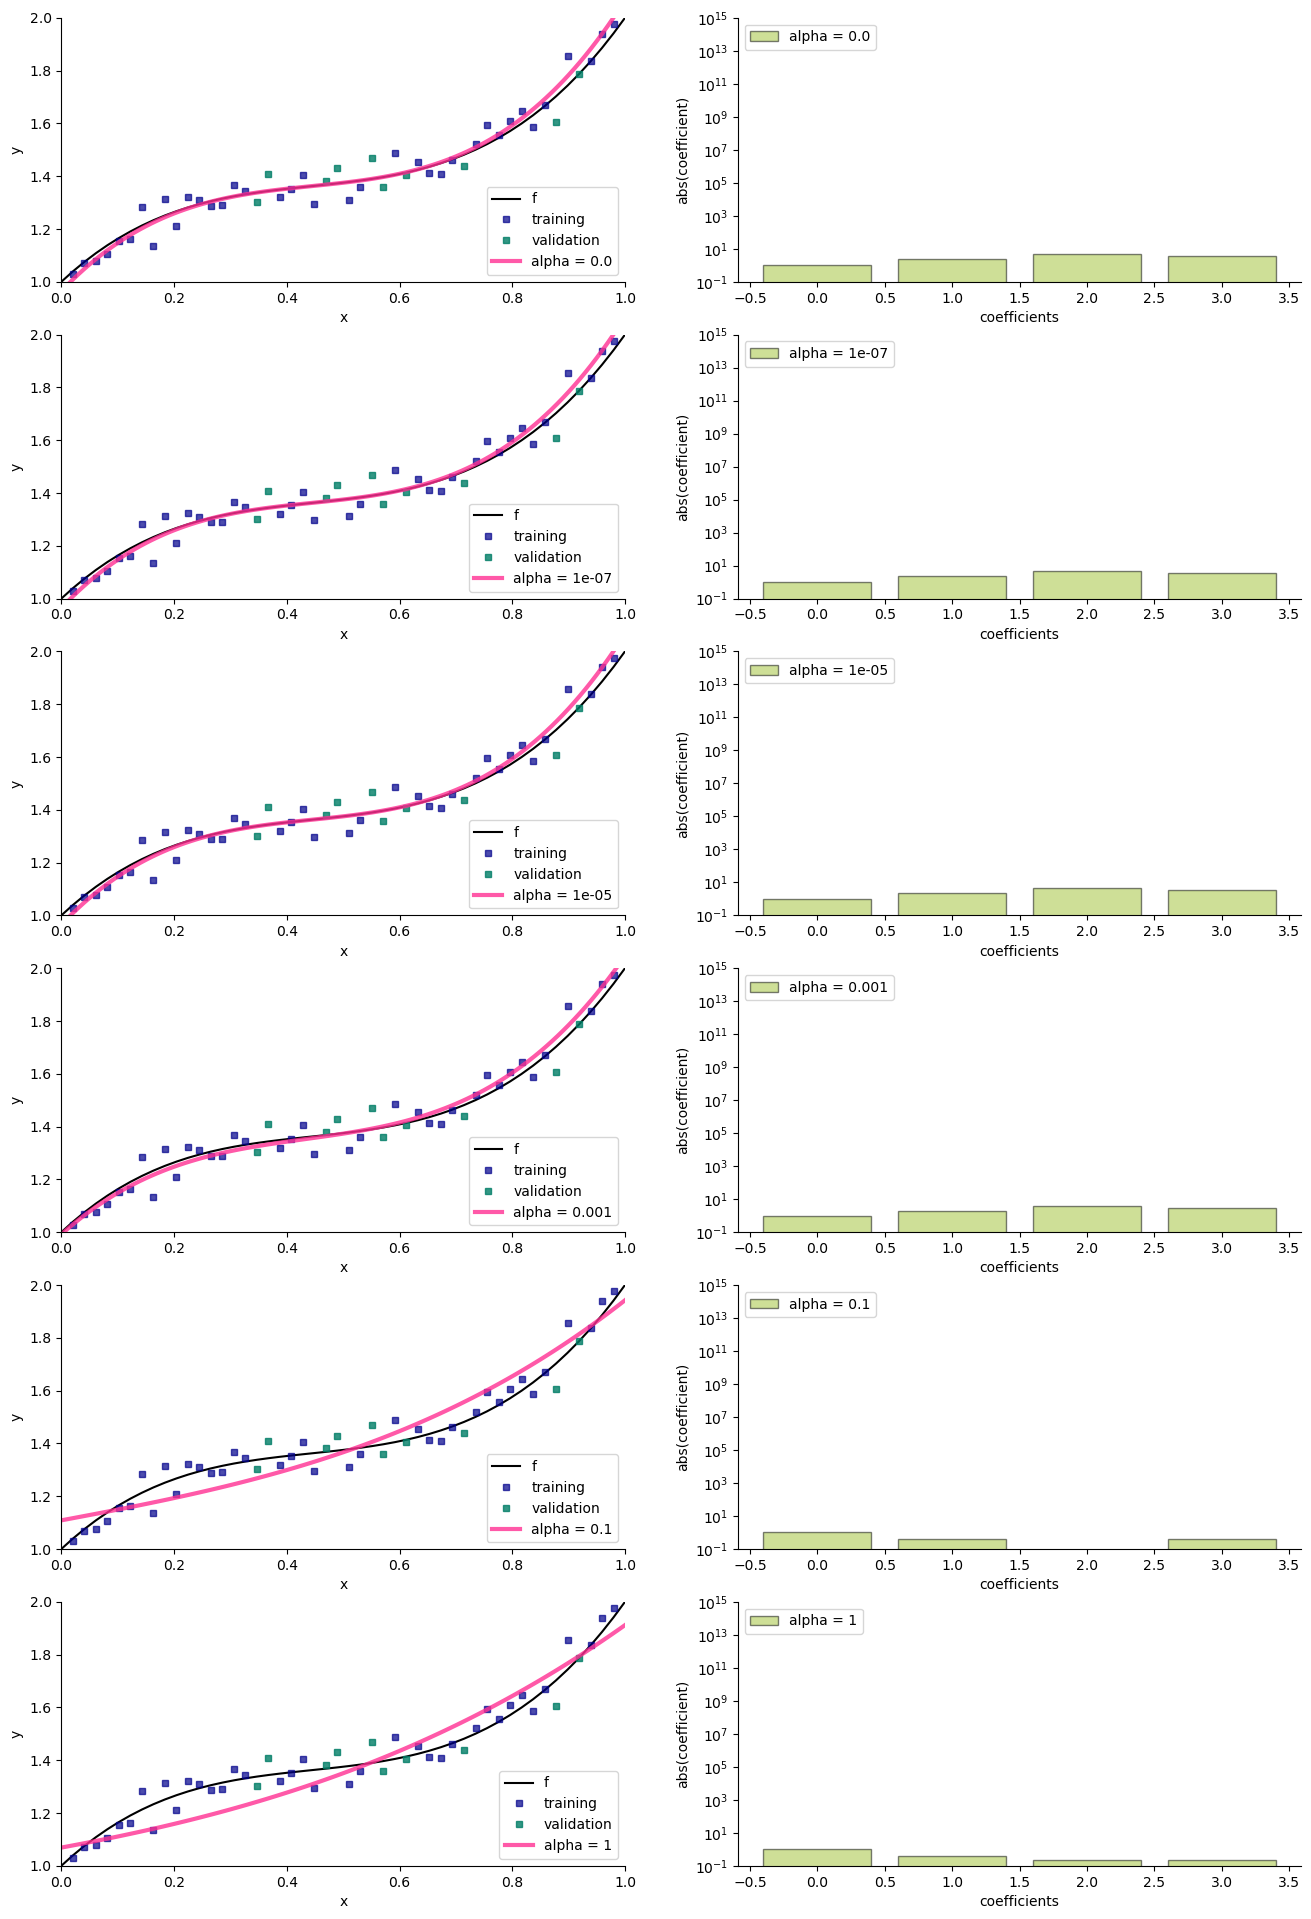

In [116]:
### edTest(test_mse) ### 

fig, rows = plt.subplots(6, 2, figsize=(16, 24))

# Select the degree for polynomial features

degree= 3

# List of hyper-parameter values 

alphas = [0.0, 1e-7,1e-5, 1e-3, 0.1,1]

# Create two lists for training and validation error

training_error, validation_error = [],[]

# Compute the polynomial features train and validation sets

x_poly_train = PolynomialFeatures(degree=degree).fit_transform(x_train) # don't include_bias=False
x_poly_val= PolynomialFeatures(degree=degree).fit_transform(x_val) #don't include_bias=False

for i, alpha in enumerate(alphas):
    l,r=rows[i]
    
    # For each i, fit a ridge regression on training set
    
    ridge_reg = Ridge(fit_intercept=False, alpha=alpha) #fit_intercept=False, 
    ridge_reg.fit(x_poly_train, y_train)
    
    # Predict on the validation set
    y_train_pred = ridge_reg.predict(x_poly_train)
    y_val_pred = ridge_reg.predict(x_poly_val)
    
    # Compute the training and validation errors
    mse_train = mean_squared_error(y_train, y_train_pred) 
    mse_val = mean_squared_error(y_val, y_val_pred)
    
    # Add that value to the list 
    training_error.append(mse_train)
    validation_error.append(mse_val)
    
    # Use helper functions plot_functions & plot_coefficients to visualise the plots
    
    plot_functions(degree, ridge_reg, l, df, alpha, x_val, y_val, x_train, y_train)
    plot_coefficients(ridge_reg, r, alpha)

sns.despine()

In [128]:
sum_of_errors = []
for i in range(6):
    sum_of_errors.append(validation_error[i] + training_error[i])
index_min = sum_of_errors.index(min(sum_of_errors))
print(min(sum_of_errors)), print(f"Index: {index_min}")

0.0054747479185016275
Index: 0


(None, None)

In [129]:
### edTest(test_hyper) ###
# Find the best value of hyper parameter, which gives the least error on the validdata

best_parameter = alphas[index_min]

print(f'The best hyper parameter value, alpha = {best_parameter}')


The best hyper parameter value, alpha = 0.0


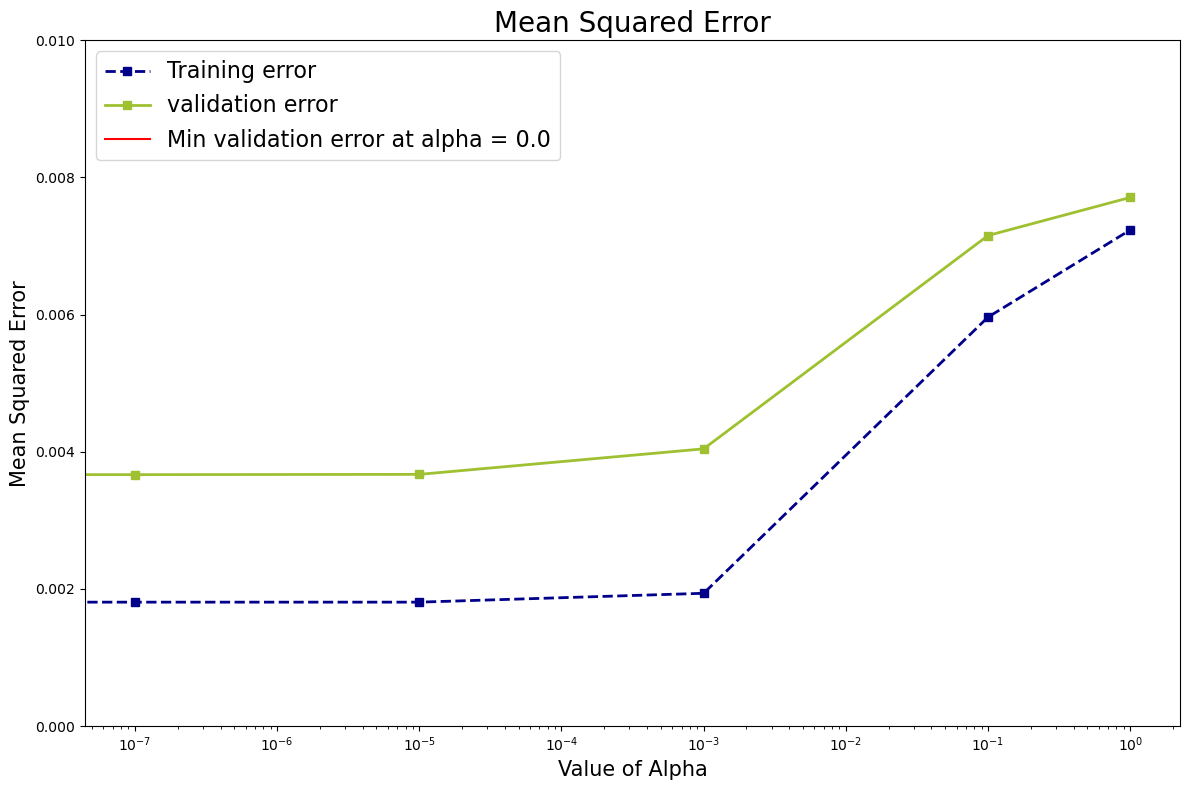

In [119]:
# Now make the MSE polots
# Plot the errors as a function of increasing d value to visualise the training and validation errors

fig, ax = plt.subplots(figsize = (12,8))

# Plot the training errors for each alpha value

ax.plot(alphas, training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)

# Plot the validation errors for each alpha value

ax.plot(alphas, validation_error,'s-', label = 'validation error',color ='#9FC131FF',linewidth=2 )

# Draw a vertical line at the best parameter

ax.axvline(best_parameter, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

ax.set_xlabel('Value of Alpha',fontsize=15)
ax.set_ylabel('Mean Squared Error',fontsize=15)
ax.set_ylim([0,0.010])
ax.legend(loc = 'upper left',fontsize=16)
ax.set_title('Mean Squared Error',fontsize=20)
ax.set_xscale('log')
plt.tight_layout()

## Fine-tune $\alpha$ value

As you see above, the the best parameter value is at $\alpha = 0.001$.
However, you can further find a better solution by experimenting with the hyper-parameter values by narrowing the selection of `alphas`

So **after marking the exercise**, Go back and remove 0, and 0.1 from the `alphas` list and replace with values close to 0.001